In [1]:
import os
os.chdir('../..')

import matplotlib.pyplot as plt
import mplhep as hep

from coffea.util import load
from coffea.hist import plot

hep.style.use(hep.style.ROOT)

In [2]:
filename = "/work/mmarcheg/PocketCoffea/output/test_pileup_variations_v09/output.coffea"
output = load(filename)
output.keys()

dict_keys(['sumw', 'nevts_initial', 'nevts_presel', 'nevts_cat_SR', 'nevts_cat_CR', 'hist_muon_pt', 'hist_muon_eta', 'hist_muon_phi', 'hist_electron_pt', 'hist_electron_eta', 'hist_electron_phi', 'hist_jet_pt', 'hist_jet_eta', 'hist_jet_phi', 'hist_nmuon', 'hist_nelectron', 'hist_nlep', 'hist_njet', 'hist_nbjet'])

In [3]:
h = output['hist_njet']
print(h.axes())
print(h.identifiers('cat'))

(<Cat (name=sample) instance at 0x7f0b0cbab310>, <Cat (name=cat) instance at 0x7f0b0cba66a0>, <Cat (name=year) instance at 0x7f0a405d1670>, <Bin (name=njet) instance at 0x7f0a40603c40>, <Cat (name=pileup) instance at 0x7f0a405d1850>)
[<StringBin (CR) instance at 0x7f0b08b6eac0>, <StringBin (SR) instance at 0x7f0b08b6ea60>]


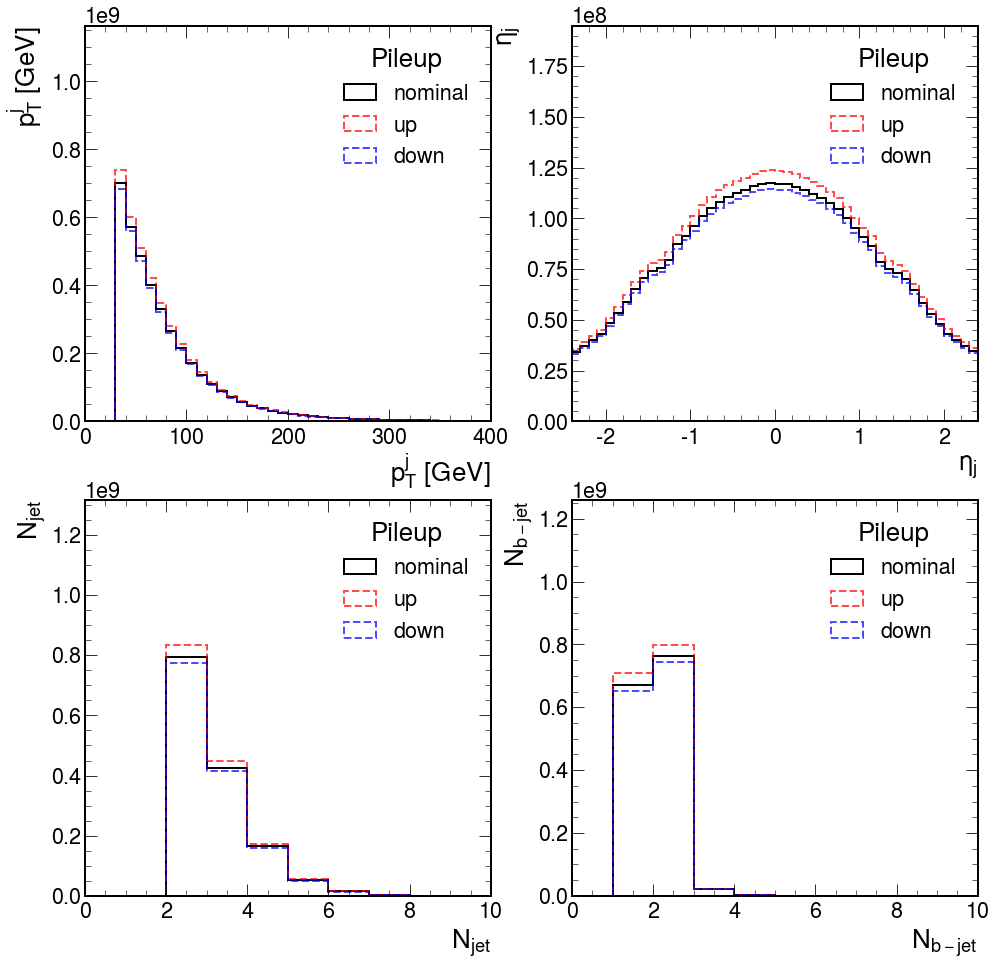

In [4]:
samples = [str(s) for s in h.identifiers('sample')]
cats    = [str(s) for s in h.identifiers('cat')]
categories_to_sum_over = ['cat', 'year', 'sample']

fig, axes = plt.subplots(2,2, figsize=[16,16])
xlims = {
    'hist_jet_pt'  : (0,400),
    'hist_jet_eta' : (-2.4,2.4),
    'hist_njet'    : (0,10),
    'hist_nbjet'    : (0,10),
}

fill_opts = {
    'facecolor' : 'None',
    'edgecolor' : ['black', 'red', 'blue'],
    'linestyle' : ['-', '--', '--'],
    'linewidth' : 2,
    'alpha'     : [1, 0.7, 0.7]
}

order = ['nominal', 'up', 'down']

for i, histname in enumerate(xlims.keys()):
    h = output[histname]
    plot.plot1d(h[(samples, 'SR', '2018')].sum(*categories_to_sum_over), ax=axes[int(i/2),i%2], fill_opts=fill_opts, order=order)
    axes[int(i/2),i%2].set_xlim(*xlims[histname])
    axes[int(i/2),i%2].set_ylim( (1.5*lim for lim in axes[int(i/2),i%2].get_ylim()) )
plt.savefig("pileup_variations.png", dpi=300)